In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
dingle ie
port alfred za
barrow us
bathsheba bb
namatanai pg
albany au
rikitea pf
tsihombe mg
tuktoyaktuk ca
dingle ie
norman wells ca
ushuaia ar
kattivakkam in
luderitz na
ribeira grande pt
kavieng pg
upernavik gl
cabo san lucas mx
hobyo so
busselton au
kapaa us
tsihombe mg
dezful ir
albany au
los llanos de aridane es
punta arenas cl
jamestown sh
busselton au
yellowknife ca
tumannyy ru
half moon bay us
coalcoman mx
port alfred za
harper lr
cuamba mz
qaanaaq gl
ziarat pk
albany au
hami cn
rikitea pf
kamenskoye ru
mataura pf
ranong th
port alfred za
ponta do sol cv
abu samrah qa
umm durman sd
paita nc
lebu cl
yellowknife ca
kaz ru
hobart au
rikitea pf
port alfred za
jamestown sh
husavik is
kodiak us
kapaa us
vaini to
chapeco br
alotau pg
kapaa us
albany au
kisesa tz
sarangani ph
kruisfontein za
yellowknife ca
punta arenas cl
rikitea pf
mkushi zm
novikovo ru
develi tr
amga ru
ulety ru
north bend us
oussouye sn
punta arenas cl
san policarpo ph
rungata ki
nishihara jp
arraial do

longyearbyen sj
ouesso cg
bastia fr
carnarvon au
portland au
busselton au
lucapa ao
puerto ayora ec
ushuaia ar
bosaso so
sao gabriel da cachoeira br
morondava mg
chuy uy
lebu cl
rikitea pf
santiago del estero ar
coquimbo cl
ushuaia ar
albany au
saskylakh ru
tome cl
steamboat springs us
georgetown sh
hermanus za
dikson ru
souillac mu
geraldton au
busselton au
bathsheba bb
bargal so
nizhneyansk ru
emerald au
samfya zm
bagotville ca
punta arenas cl
linares cl
zhangjiakou cn
georgetown sh
new norfolk au
asau tv
hasaki jp
dikson ru
illoqqortoormiut gl
saint-philippe re
upernavik gl
roald no
karratha au
chuy uy
ilulissat gl
tuktoyaktuk ca
bara sd
sorland no
torbay ca
jamestown sh
qingyuan cn
albany au
kapaa us
belushya guba ru
east london za
bodden town ky
geraldton au
ugoofaaru mv
busselton au
thayetmyo mm
rungata ki
alexandria eg
taolanaro mg
san patricio mx
deputatskiy ru
bluff nz
daitari in
mys shmidta ru
port elizabeth za
kahului us
rikitea pf
ushuaia ar
taolanaro mg
rikitea pf
pangoa p

carnarvon au
nabire id
barentsburg sj
new norfolk au
bredasdorp za
tsihombe mg
busselton au
isangel vu
tianpeng cn
jamestown sh
mys shmidta ru
lompoc us
hilo us
ushuaia ar
yatou cn
port elizabeth za
busselton au
hunchun cn
butaritari ki
new norfolk au
gamba ga
rikitea pf
new norfolk au
rundu na
mataura pf
bambous virieux mu
illoqqortoormiut gl
ushuaia ar
roald no
nome us
punta arenas cl
havre-saint-pierre ca
hobart au
kirkwall gb
deputatskiy ru
hilo us
college us
puerto ayora ec
bubaque gw
saint george bm
yamasaki jp
port elizabeth za
mar del plata ar
kununurra au
mandalgovi mn
mahebourg mu
port hardy ca
zvishavane zw
albany au
victoria sc
ostrovnoy ru
nikolskoye ru
cidreira br
mangai cd
lages br
rikitea pf
fairbanks us
vaitupu wf
castro cl
nanortalik gl
cabo san lucas mx
marzuq ly
rikitea pf
kyshtovka ru
aklavik ca
sentyabrskiy ru
lorengau pg
puerto ayora ec
pangkalanbuun id
el badari eg
port-gentil ga
grand centre ca
busselton au
busselton au
hobart au
kawana waters au
bluff nz
hobar

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b99b71d6d6cd906164b0eac00606012


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | dingle
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | namatanai
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kattivakkam
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | hobyo
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | dezful
Processing Record 22 of Set 1 | los llanos de ar

Processing Record 35 of Set 4 | klaksvik
Processing Record 36 of Set 4 | shitanjing
Processing Record 37 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 4 | ninghai
Processing Record 39 of Set 4 | de aar
Processing Record 40 of Set 4 | soyo
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | nome
Processing Record 43 of Set 4 | sikeston
Processing Record 44 of Set 4 | stamsund
City not found. Skipping...
Processing Record 45 of Set 4 | khonuu
City not found. Skipping...
Processing Record 46 of Set 4 | birin
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | arkhangelos
City not found. Skipping...
Processing Record 49 of Set 4 | kahului
Processing Record 50 of Set 4 | kualakapuas
Processing Record 1 of Set 5 | faya
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | sembe
Processing Record 4 of Set 5 | acajutla
Processing Record 5 of Set 5 | chimbote
Processing Record 6 of Set 5 | ambilobe
Proce

Processing Record 27 of Set 8 | sorland
Processing Record 28 of Set 8 | qingyuan
Processing Record 29 of Set 8 | bodden town
Processing Record 30 of Set 8 | ugoofaaru
Processing Record 31 of Set 8 | thayetmyo
Processing Record 32 of Set 8 | alexandria
Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | deputatskiy
Processing Record 35 of Set 8 | daitari
Processing Record 36 of Set 8 | pangoa
Processing Record 37 of Set 8 | fez
Processing Record 38 of Set 8 | birao
Processing Record 39 of Set 8 | port hardy
Processing Record 40 of Set 8 | marica
Processing Record 41 of Set 8 | tubuala
Processing Record 42 of Set 8 | clyde river
Processing Record 43 of Set 8 | mpanda
Processing Record 44 of Set 8 | mokshan
Processing Record 45 of Set 8 | yulara
Processing Record 46 of Set 8 | ovalle
Processing Record 47 of Set 8 | norsup
Processing Record 48 of Set 8 | gulshat
City not found. Skipping...
Processing Record 49 of Set 8 | nantucket
Processing Record 50 of Set 8 | se

City not found. Skipping...
Processing Record 15 of Set 12 | kindu
Processing Record 16 of Set 12 | san cristobal
Processing Record 17 of Set 12 | windhoek
Processing Record 18 of Set 12 | troitsko-pechorsk
Processing Record 19 of Set 12 | aberystwyth
Processing Record 20 of Set 12 | mitu
Processing Record 21 of Set 12 | jha jha
Processing Record 22 of Set 12 | southbridge
Processing Record 23 of Set 12 | nanning
Processing Record 24 of Set 12 | yinchuan
Processing Record 25 of Set 12 | marcona
City not found. Skipping...
Processing Record 26 of Set 12 | lesnoy
Processing Record 27 of Set 12 | damghan
Processing Record 28 of Set 12 | katherine
Processing Record 29 of Set 12 | meyungs
City not found. Skipping...
Processing Record 30 of Set 12 | sorsk
Processing Record 31 of Set 12 | orito
Processing Record 32 of Set 12 | belance
Processing Record 33 of Set 12 | rodrigues alves
Processing Record 34 of Set 12 | fukue
Processing Record 35 of Set 12 | minab
Processing Record 36 of Set 12 | 

In [14]:
len(city_data)

593

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-10-24 01:22:35,-23.12,-134.97,74.03,81,100,14.99
1,Dingle,PH,2020-10-24 01:22:35,11.00,122.67,75.87,92,100,10.00
2,Port Alfred,ZA,2020-10-24 01:22:35,-33.59,26.89,68.45,89,99,17.76
3,Barrow,US,2020-10-24 01:20:02,71.29,-156.79,28.40,92,90,10.29
4,Bathsheba,BB,2020-10-24 01:22:35,13.22,-59.52,84.20,70,40,24.16
5,Namatanai,PG,2020-10-24 01:21:21,-3.67,152.43,86.32,59,15,2.21
6,Albany,US,2020-10-24 01:22:35,42.60,-73.97,64.99,82,4,6.67
7,Tuktoyaktuk,CA,2020-10-24 01:22:36,69.45,-133.04,24.80,92,90,6.93
8,Norman Wells,CA,2020-10-24 01:22:36,65.28,-126.83,28.40,100,75,4.70
9,Ushuaia,AR,2020-10-24 01:22:36,-54.80,-68.30,41.00,82,75,8.05


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603502637.0765564

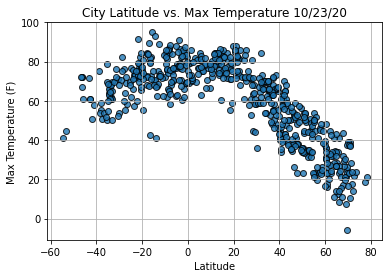

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

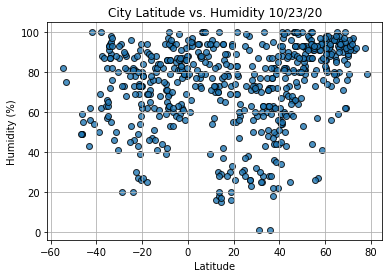

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

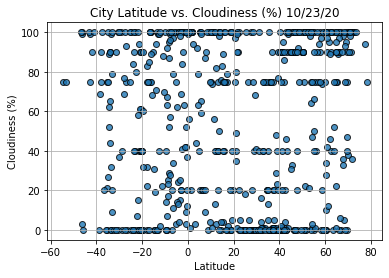

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

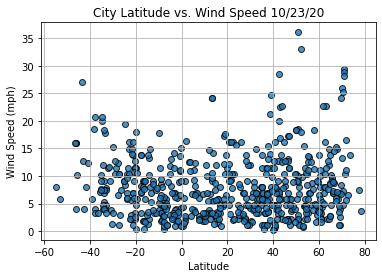

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                      Kavieng
Country                        PG
Date          2020-10-24 01:22:37
Lat                         -2.57
Lng                         150.8
Max Temp                    84.61
Humidity                       62
Cloudiness                     84
Wind Speed                   3.98
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
588    False
589    False
590    False
591     True
592     True
Name: Lat, Length: 593, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-10-24 01:22:35,-23.12,-134.97,74.03,81,100,14.99
1,Dingle,PH,2020-10-24 01:22:35,11.00,122.67,75.87,92,100,10.00
2,Port Alfred,ZA,2020-10-24 01:22:35,-33.59,26.89,68.45,89,99,17.76
3,Barrow,US,2020-10-24 01:20:02,71.29,-156.79,28.40,92,90,10.29
4,Bathsheba,BB,2020-10-24 01:22:35,13.22,-59.52,84.20,70,40,24.16


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

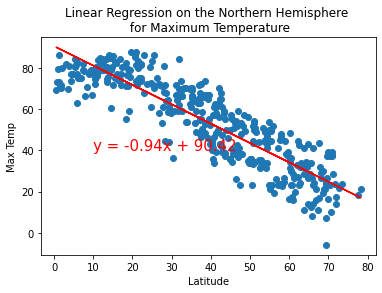

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Incorporate the other graph properties.
#plt.title("Linear Regression on Northern Hemisphere for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

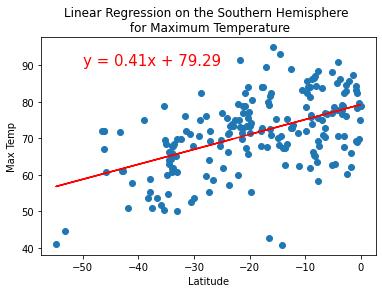

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#plt.title("Linear Regression on Southern Hemisphere for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

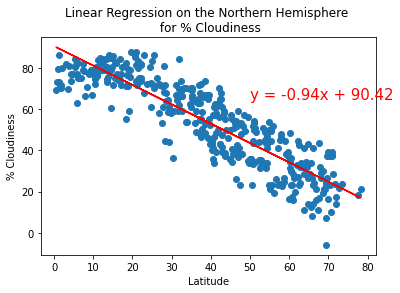

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#plt.title("Linear Regression on Northern Hemisphere for Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(50,65))

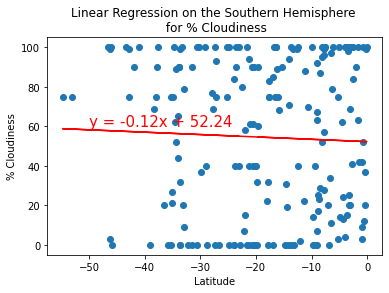

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#plt.title("Linear Regression on Southern Hemisphere for Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

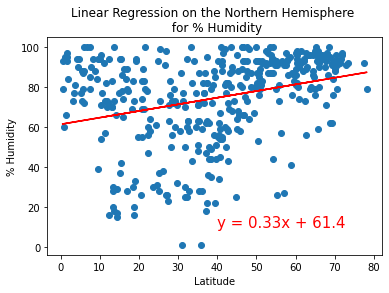

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#plt.title("Linear Regression on Northern Hemisphere for %Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

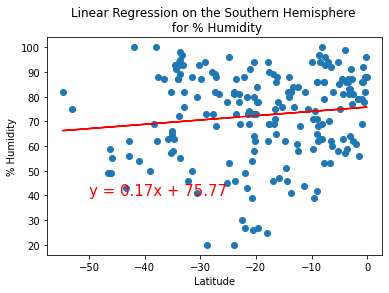

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#plt.title("Linear Regression on Southern Hemisphere for %Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,40))

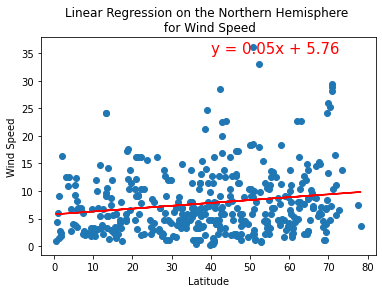

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#plt.title("Linear Regression on Northern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

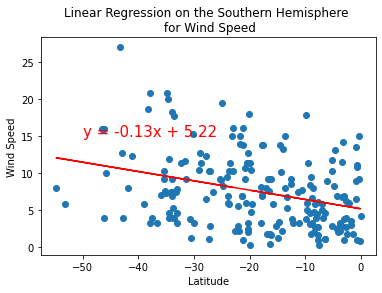

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#plt.title("Linear Regression on Southern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,15))

In [36]:
# Google API Key
g_key = "your Google API key goes here"